In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

log = pd.read_csv("./grid2.txt")


In [2]:
a = log.drop_duplicates().sort_values(by="loss").reset_index()


In [3]:
a.head(10)


,index,x1,x10,y1,y2,loss
0,651,-4,-9,0.008352,0.425952,0.000141
1,612,-5,-8,-0.012664,0.423743,0.000199
2,652,-4,-8,0.001243,0.392511,0.000626
3,690,-3,-10,0.029368,0.428161,0.000976
4,691,-3,-9,0.022259,0.394720,0.001014
5,613,-5,-7,-0.019774,0.390302,0.001131
6,573,-6,-7,-0.033681,0.421534,0.001151
7,611,-5,-9,-0.005555,0.457183,0.001606
8,650,-4,-10,0.015461,0.459392,0.001994
9,572,-6,-8,-0.026571,0.454974,0.002110


In [4]:
delta = 0.1

x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
l = len(x)
Z = np.zeros(shape=(l, l))
X, Y = np.meshgrid(x, y)


In [5]:
for i in range(l):
    Z[i] = a[a["x10"] == -20 + i].sort_values(by="x1")["loss"]


<IPython.core.display.Javascript object>


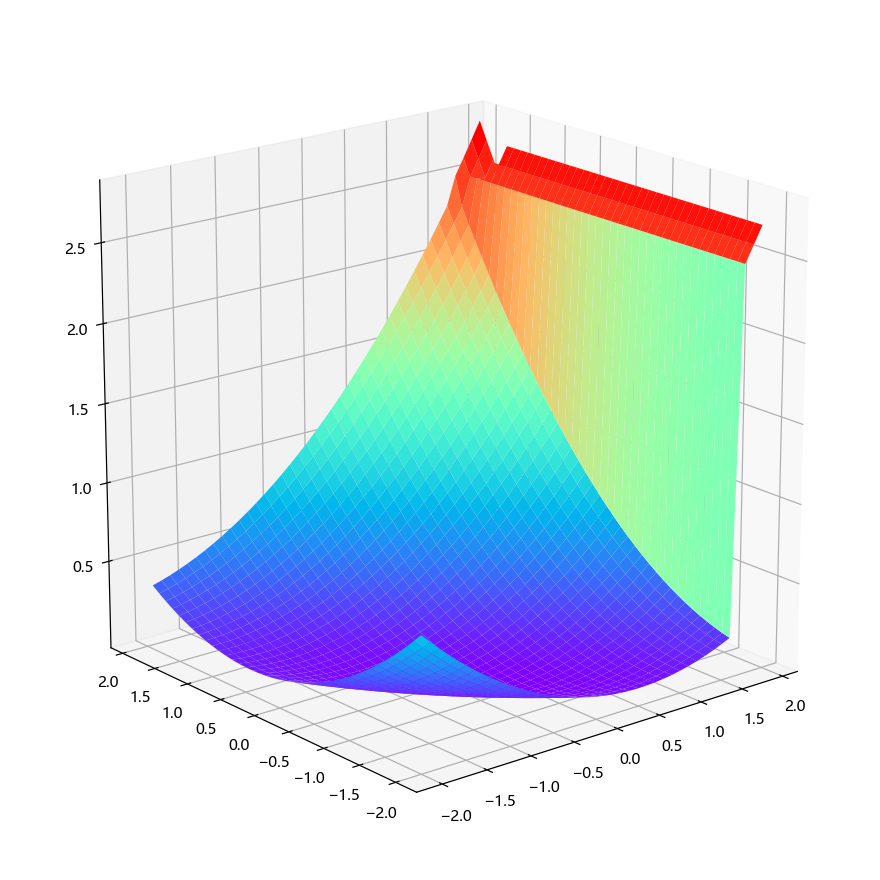

In [7]:
% matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z,
                rstride=1,
                cstride=1,
                cmap=plt.get_cmap('rainbow'))
